### Основные понятия статистики

Задания

1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
3. На каких платформах произошло больше всего релизов?
4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?
5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

Описание данных

Имеются следующие поля:

* Rank – место по объему продаж
* Name – название игры
* Platform – платформа, на которой выпущена игра
* Year – год релиза
* Genre – жанр
* Publisher – издатель
* NA_Sales – продажи в Северной Америке, в млн.
* EU_Sales – продажи в Европе, в млн.
* JP_Sales – продажи в Японии, в млн.
* Other_Sales – продажи в остальном мире, в млн.
* Global_Sales – продажи по всему миру, в млн.

In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import os

from kaggle.api.kaggle_api_extended import KaggleApi

In [18]:
os.chdir("C:/api")
data = {"username":"username","key":"tockenvalue"}
with open('kaggle.json', 'w') as outfile:
    json.dump(data, outfile)

api = KaggleApi('kaggle.json')
api.authenticate()

url = "gregorut/videogamesales"

api.dataset_download_files(url, path=r'C:\Users\User\notebooks\analytic_karpov\статистика\datasets',
                           unzip=True)                  

Dataset URL: https://www.kaggle.com/datasets/gregorut/videogamesales


1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.


In [50]:
url = r'C:\Users\User\notebooks\analytic_karpov\статистика\datasets\vgsales.csv'
data_games = pd.read_csv(url)

data_games.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [51]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [52]:
data_games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [53]:
data_games.dropna(inplace=True)

2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.

In [54]:
data_games.Year.aggregate(['mean', 'median'])

mean      2006.405561
median    2007.000000
Name: Year, dtype: float64

In [55]:
data_games.Year.mode()

0    2009.0
Name: Year, dtype: float64

In [56]:
data_games['Year'].median()

2007.0

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


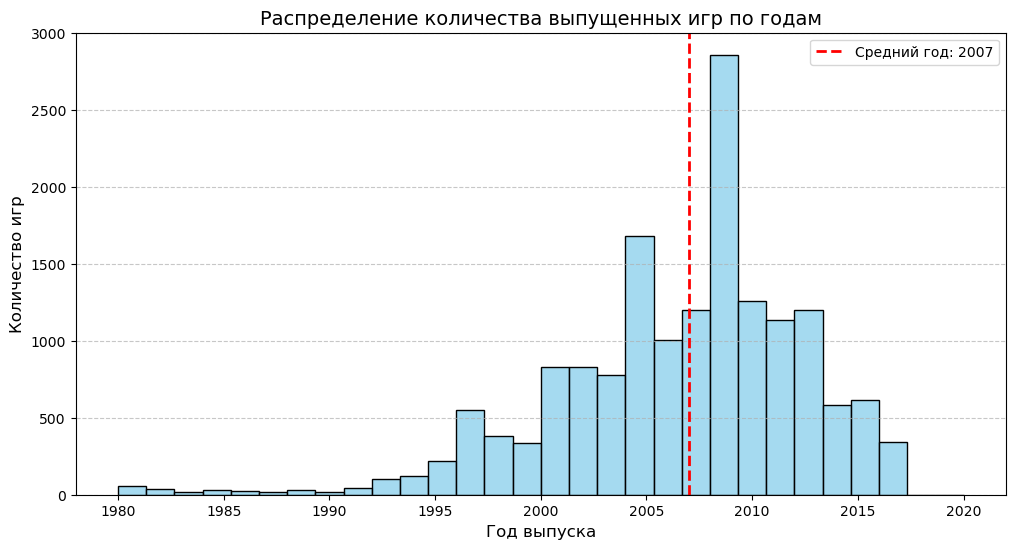

In [57]:
plt.figure(figsize=(12, 6))
sns.histplot(data_games["Year"], bins=30, kde=False, color="skyblue")

plt.axvline(data_games['Year'].median(), color="red", linestyle="dashed", linewidth=2, label=f"Средний год: {int(data_games['Year'].median())}")

plt.xlabel("Год выпуска", fontsize=12)
plt.ylabel("Количество игр", fontsize=12)
plt.title("Распределение количества выпущенных игр по годам", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.legend()

plt.show()

* Мода - в 2009
* Больше всего игр выпущено после 2007 года (2007 - медиана)

3. На каких платформах произошло больше всего релизов?


Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.



In [59]:
frequency = data_games.Platform.value_counts(normalize=True) * 100
frequency

Platform
DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
PC       5.757780
XB       4.929102
GBA      4.824750
GC       3.326990
3DS      3.063041
PSV      2.516727
PS4      2.062488
N64      1.939721
SNES     1.467068
XOne     1.307470
SAT      1.061936
WiiU     0.877785
2600     0.712050
NES      0.601559
GB       0.595421
DC       0.319195
GEN      0.165736
NG       0.073660
SCD      0.036830
WS       0.036830
3DO      0.018415
TG16     0.012277
GG       0.006138
PCFX     0.006138
Name: proportion, dtype: float64

In [68]:
more_7_procent = frequency[frequency > 7]
more_7_procent

Platform
DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
Name: proportion, dtype: float64

4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?


In [69]:
data_games.Publisher.value_counts()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

Первые 5 строчек - издатели с часто встречаемыми играми

5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)

In [71]:
nintendo_data = data_games[data_games["Publisher"] == "Nintendo"] 
nintendo_data.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [72]:
nintendo_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].agg(['mean', 'median', 'std'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
mean,1.172055,0.601006,0.653721,0.136767
median,0.375000,0.120000,0.280000,0.030000
std,2.989913,1.743953,1.063110,0.464170


В NA_sales - медианное значение самое большое

6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

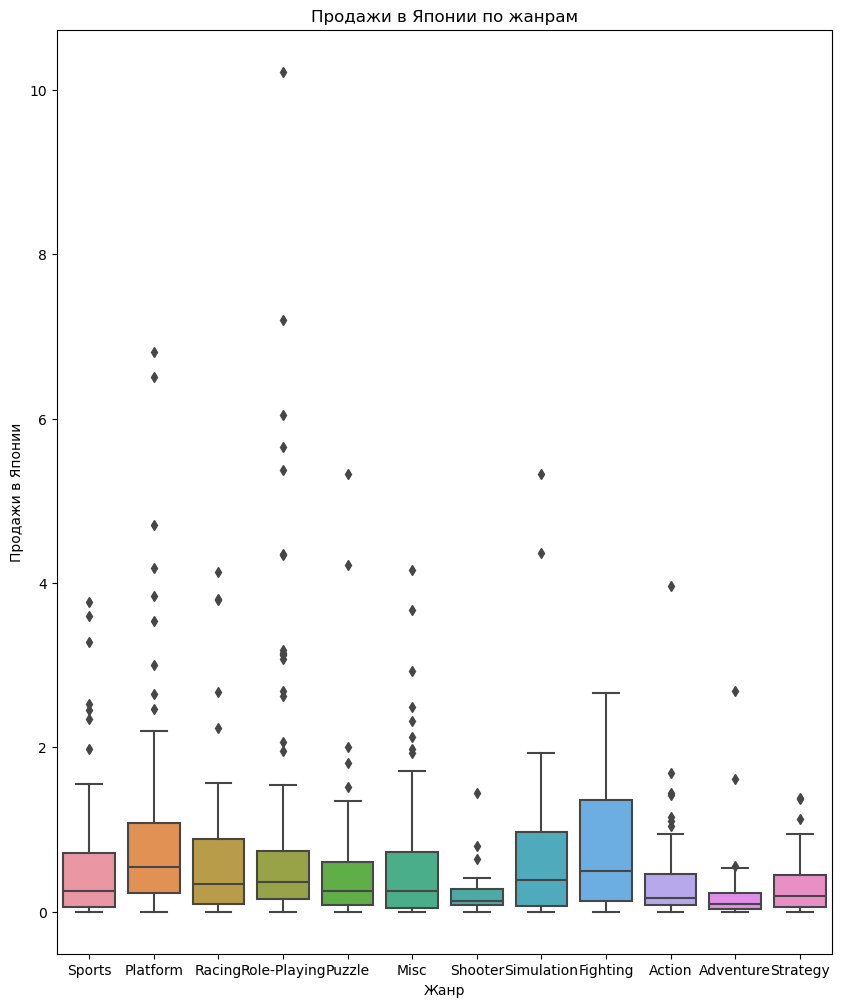

In [81]:
plt.figure(figsize=(10, 12))
sns.boxplot(x=nintendo_data.Genre, y=nintendo_data.JP_Sales)

plt.xlabel('Жанр')
plt.ylabel('Продажи в Японии')
plt.title('Продажи в Японии по жанрам')

plt.show()

* Межквартильный размах у Strategy меньше, чем у Puzzle
* Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation
* Наибольший межквартильный размах наблюдается у игр жанра Fighting

7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


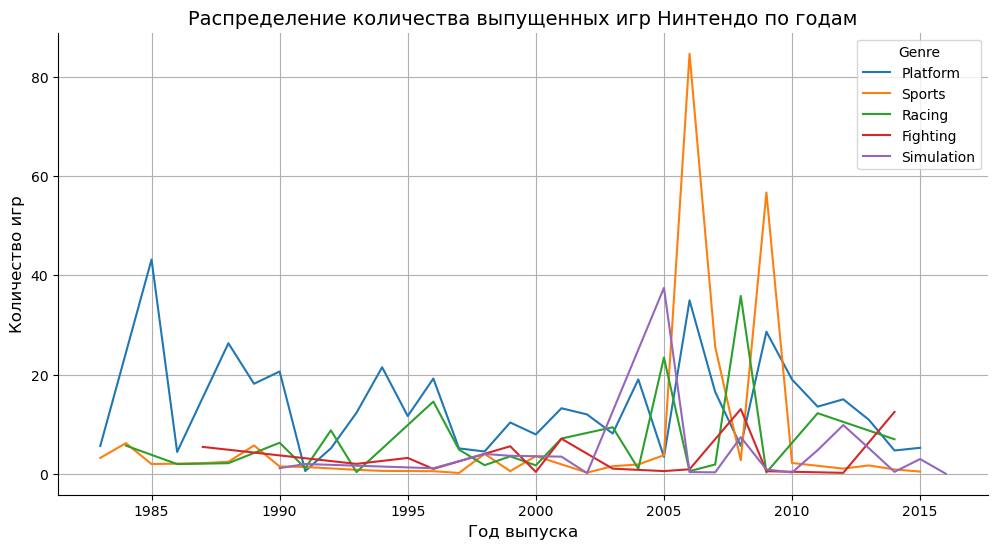

In [84]:
global_genres = nintendo_data.query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')") \
        .groupby(['Year', 'Genre'], as_index=False).Global_Sales.sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x = global_genres.Year, y = global_genres.Global_Sales, hue = global_genres.Genre, data = global_genres)
sns.despine()

plt.xlabel("Год выпуска", fontsize=12)
plt.ylabel("Количество игр", fontsize=12)
plt.title("Распределение количества выпущенных игр Нинтендо по годам", fontsize=14)
plt.grid(True)

plt.show()


SPORTS - 2005-2010